# Part I - Pisa Study 2012
## by Luca Brandt

## Preliminary Wrangling


In [99]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stats
import pylab
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)

In [100]:
pisa_all = pd.read_csv('pisa2012.csv', encoding='ISO-8859-1');

In [101]:
pisa_all.sample(2)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
437194,437195,Slovak Republic,7030000,SVK0008,OECD,Slovak Republic,208,4189,10,4.0,...,15.9187,15.9187,7.5676,7.5676,7.5676,7.5676,45,2,0.2147,22NOV13
186534,186535,France,2500000,FRA0005,OECD,France,99,2031,9,1.0,...,76.3202,209.3703,209.3703,209.3703,209.3703,76.3202,6,2,0.2093,22NOV13


In [102]:
len([c for c in set(pisa_all['CNT'])]) #  Nr of countries in the data

68

In [103]:
pisa_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


In [104]:
pisa_all.shape

(485490, 636)

In [105]:
pisa_all.dtypes

Unnamed: 0      int64
CNT            object
SUBNATIO        int64
STRATUM        object
OECD           object
               ...   
W_FSTR80      float64
WVARSTRR        int64
VAR_UNIT        int64
SENWGT_STU    float64
VER_STU        object
Length: 636, dtype: object

In [106]:
print(pisa_all.shape)
print(pisa_all.columns)

(485490, 636)
Index(['Unnamed: 0', 'CNT', 'SUBNATIO', 'STRATUM', 'OECD', 'NC', 'SCHOOLID',
       'STIDSTD', 'ST01Q01', 'ST02Q01',
       ...
       'W_FSTR75', 'W_FSTR76', 'W_FSTR77', 'W_FSTR78', 'W_FSTR79', 'W_FSTR80',
       'WVARSTRR', 'VAR_UNIT', 'SENWGT_STU', 'VER_STU'],
      dtype='object', length=636)


#### Column encodings
- CNT... Country
- STIDSTD... Student ID
- SCHOOLID... School ID
- ST01Q01... International Grade
- ST03Q02... Birth Year
- ST04Q01... Gender
- ST13Q01... Mother highest schooling
- ST17Q01... Father highest schooling
- ST26Q06... Possession of Internet
- AGE... Age of student
- WEALTH.. Wealth
- W_FSTUWT... Final Student Weight
- (GRADE.. Current Grade)
- SMINS... Learning time per week in mins
- W_FSTUWT... Final Student Score



In [107]:
pisa_all['W_FSTR12'].value_counts()

1.5000      7172
0.5000      7133
38.4546     1031
1.5027       970
0.5009       959
            ... 
6.5698         1
9.3066         1
6.2582         1
175.7860       1
3.0652         1
Name: W_FSTR12, Length: 47227, dtype: int64

In [108]:
# To not have to work with all the data, I create a subset with some columns of interest
pisa = pisa_all[['CNT', 'STIDSTD', 'SCHOOLID', 'ST01Q01', 'ST03Q02', 'ST04Q01', 'ST13Q01', 'ST17Q01', 'ST26Q06', 'AGE', 'WEALTH', 'ESCS', 'SMINS', 'W_FSTUWT', 'PV1MATH', 'PV1SCIE', 'PV1READ']].copy()
#pisa = pisa_all.copy()
pisa.head(2)

,CNT,STIDSTD,SCHOOLID,ST01Q01,ST03Q02,ST04Q01,ST13Q01,ST17Q01,ST26Q06,AGE,WEALTH,ESCS,SMINS,W_FSTUWT,PV1MATH,PV1SCIE,PV1READ
0,Albania,1,1,10,1996,Female,<ISCED level 3A>,<ISCED level 3A>,No,16.17,-2.92,NaN,NaN,8.9096,406.8469,341.7009,249.5762
1,Albania,2,1,10,1996,Female,<ISCED level 3A>,<ISCED level 3A>,Yes,16.17,0.69,NaN,90.0,8.9096,486.1427,548.9929,406.2936


In [109]:
# Give the columns to more intuitive names
pisa.rename(columns={'CNT':'country', 'STIDSTD':'student_id', 'SCHOOLID':'school_id', 'ST01Q01':'int_grade', 'ST03Q02':'birt_year', 'ST04Q01':'gender', 'ST13Q01':'mother_degree', 'ST17Q01':'father_degree', 'ST26Q06':'internet', 'AGE':'age', 'WEALTH':'wealth', 'ESCS':'eco_social_cultural_status', 'SMINS':'study_time_min_per_week', 'W_FSTUWT':'student_score_weight', 'PV1MATH':'math_score', 'PV1SCIE':'sci_score', 'PV1READ':'read_score'}, inplace=True)
pisa.head(2)

,country,student_id,school_id,int_grade,birt_year,gender,mother_degree,father_degree,internet,age,wealth,eco_social_cultural_status,study_time_min_per_week,student_score_weight,math_score,sci_score,read_score
0,Albania,1,1,10,1996,Female,<ISCED level 3A>,<ISCED level 3A>,No,16.17,-2.92,NaN,NaN,8.9096,406.8469,341.7009,249.5762
1,Albania,2,1,10,1996,Female,<ISCED level 3A>,<ISCED level 3A>,Yes,16.17,0.69,NaN,90.0,8.9096,486.1427,548.9929,406.2936


In [110]:
pisa.dtypes.to_dict()

{'country': dtype('O'),
 'student_id': dtype('int64'),
 'school_id': dtype('int64'),
 'int_grade': dtype('int64'),
 'birt_year': dtype('int64'),
 'gender': dtype('O'),
 'mother_degree': dtype('O'),
 'father_degree': dtype('O'),
 'internet': dtype('O'),
 'age': dtype('float64'),
 'wealth': dtype('float64'),
 'eco_social_cultural_status': dtype('float64'),
 'study_time_min_per_week': dtype('float64'),
 'student_score_weight': dtype('float64'),
 'math_score': dtype('float64'),
 'sci_score': dtype('float64'),
 'read_score': dtype('float64')}

In [111]:
# Finding the Null values for later use
pisa.isnull().sum()

country                            0
student_id                         0
school_id                          0
int_grade                          0
birt_year                          0
gender                             0
mother_degree                  27511
father_degree                  42229
internet                       12308
age                              116
wealth                          5893
eco_social_cultural_status     11842
study_time_min_per_week       214576
student_score_weight               0
math_score                         0
sci_score                          0
read_score                         0
dtype: int64

In [112]:
pisa.shape

(485490, 17)

In [113]:
pisa.duplicated().sum()

0

In [114]:
# the student_id is not unique for some reason
pisa[pisa['student_id'] == 1].head(3)

,country,student_id,school_id,int_grade,birt_year,gender,mother_degree,father_degree,internet,age,wealth,eco_social_cultural_status,study_time_min_per_week,student_score_weight,math_score,sci_score,read_score
0,Albania,1,1,10,1996,Female,<ISCED level 3A>,<ISCED level 3A>,No,16.17,-2.92,NaN,NaN,8.9096,406.8469,341.7009,249.5762
4743,United Arab Emirates,1,1,10,1996,Male,<ISCED level 3A>,<ISCED level 3A>,Yes,15.75,-1.06,0.65,NaN,2.8838,328.2521,397.2771,313.5423
16243,Argentina,1,1,10,1996,Female,<ISCED level 3A>,NaN,Yes,16.00,0.70,0.25,NaN,237.1199,441.8212,483.7188,463.2456


### Structure

The DataFrame I use has 485490 rows and 17 columns. The data in pisa.csv was already pretty clean. For my analysis I had to find the variables in the data I am interested in, extract them and give them names that are more intuitive. Besides form a lot of Null values in mother_degree, father_degree, internet, and study_time_min_per_week the data can be used for analysis. 

### Main features

I am mostly interested in the following features: 
- Country, Gender, Age, Highest Schooling of Parents, Possession of Internet, Math, Reading and Science Scores

I am highly interested to find out which of these factors have the most influence on the student's final math, reading and sciences scores but also about the correlations among these factors. <br><br>
For instance:
- does the math score improve with more study time 
- what kind of schooling did their parents receive
- how does the parents eduction influence their children's test scores
- how many test were taken per country
- how are the test scores distributed
- does internet access improve ones score

# Univariate Exploration

Let's take a first look at the data by creating some visuals

In [116]:
def plots(x, y, title, rot=0):
    """ plots(x, y, title, rot)
        Function to set a plots x- and y-axis, title and the x-label rotation
        
        Args:
        x: x-label
        y: y-label
        title: title of plot
        rot: x-label rotation
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.xticks(rotation=rot)

### Let's see where most tests were taken


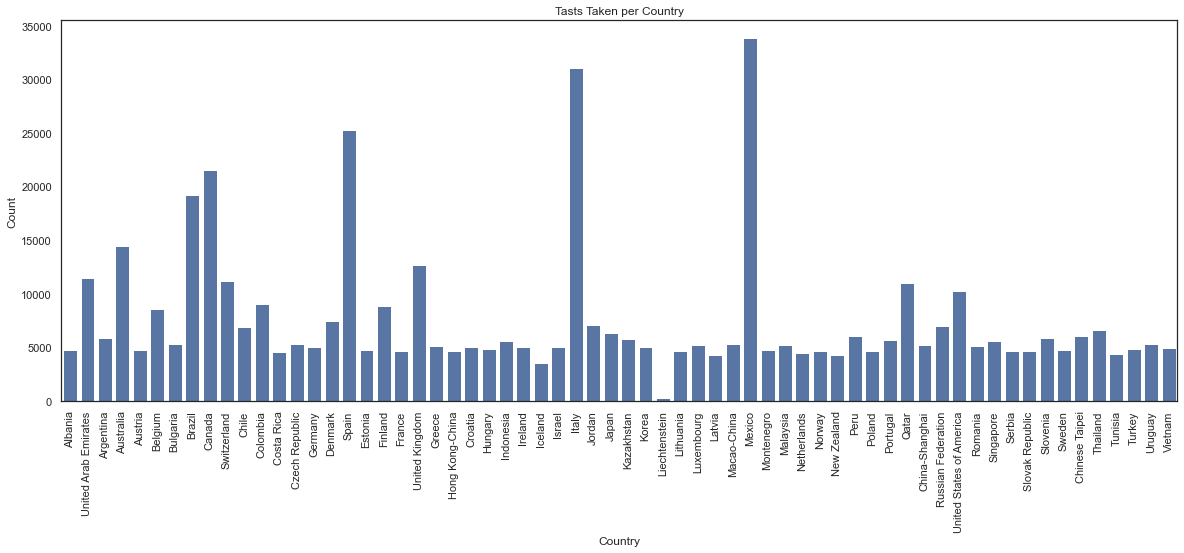

In [76]:
plt.rcParams["figure.figsize"] = (20,7)

# set the color
base_color = sb.color_palette()[0]
# Plot the distribution where how many test were taken
f = sb.countplot(data=pisa, x='country', color=base_color)
# Rotate the x labels 90 degrees
# Give the plot a title and label the axis
f = plots('Country', 'Count', 'Tasts Taken per Country', 90)


### Conclusion
The USA is five times present in the plot. Russia twice. I will put each them together for the next plot.

In [15]:
# Filter for the other names the USA uses and change it to United States of America
pisa.loc[pisa['country'] == 'Florida (USA)', 'country'] = 'United States of America'
pisa.loc[pisa['country'] == 'Connecticut (USA)', 'country'] = 'United States of America'
pisa.loc[pisa['country'] == 'Massachusetts (USA)', 'country'] = 'United States of America'
pisa.loc[pisa['country'] == 'USA', 'country'] = 'United States of America'
pisa.loc[pisa['country'] == 'Perm(Russian Federation)', 'country'] = 'Russian Federation'

In [16]:
# Example Test
pisa[pisa['country'] == 'Massachusetts (USA)']

,country,student_id,school_id,int_grade,birt_year,gender,mother_degree,father_degree,internet,age,wealth,eco_social_cultural_status,study_time_min_per_week,student_score_weight,math_score,sci_score,read_score


In [17]:
# Check how many countries are in pisa
len(pisa['country'].unique())

64

In [18]:
# Set the color that is beeing used in most plots (blue)
base_color = sb.color_palette()[0]

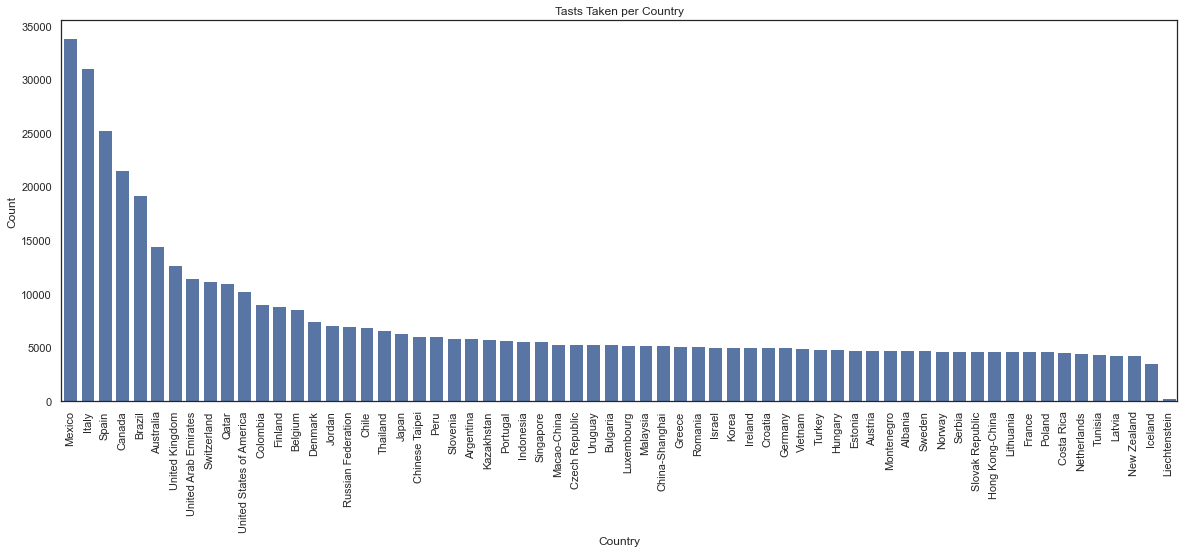

In [62]:
plt.rcParams["figure.figsize"] = (20,7);

# Order the countries. Highest value on the left with decreasing order to the right
freq = pisa['country'].value_counts()
gen_ord = freq.index
# Ordered plot. the distribution where how many test were taken
sb.countplot(data=pisa, x='country', color=base_color, order=gen_ord)
f = plots('Country', 'Count', 'Tasts Taken per Country', 90)

### Conclusion:
Here we can see where how many test were taken. Mexico, Italy and Spain took most tests. Meanwhile Lichtenstein hardly even participated. (probably due to their small population)

In [20]:
pisa.head(2)

,country,student_id,school_id,int_grade,birt_year,gender,mother_degree,father_degree,internet,age,wealth,eco_social_cultural_status,study_time_min_per_week,student_score_weight,math_score,sci_score,read_score
0,Albania,1,1,10,1996,Female,<ISCED level 3A>,<ISCED level 3A>,No,16.17,-2.92,NaN,NaN,8.9096,406.8469,341.7009,249.5762
1,Albania,2,1,10,1996,Female,<ISCED level 3A>,<ISCED level 3A>,Yes,16.17,0.69,NaN,90.0,8.9096,486.1427,548.9929,406.2936


### Next I would like to see how the genders are distributed


In [21]:
# Count the amount of boys and girls
pisa['gender'].value_counts()

Female    245064
Male      240426
Name: gender, dtype: int64

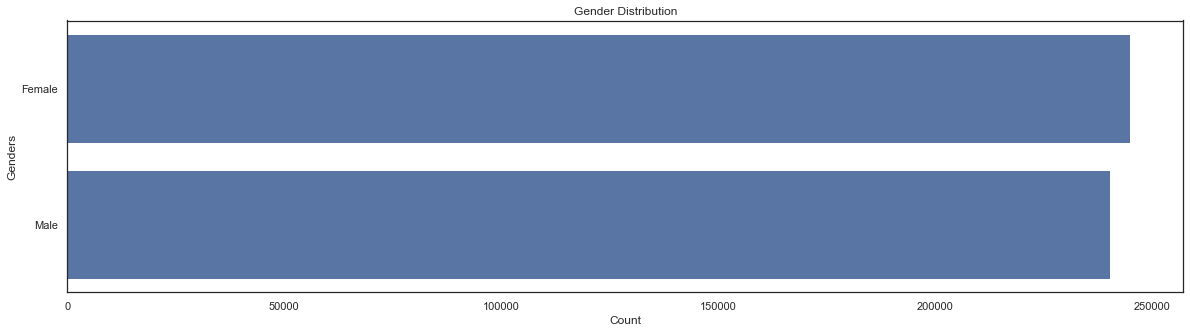

In [77]:
plt.rcParams["figure.figsize"] = (20,5)

# Plot the gender distribution in the data set
sb.countplot(y='gender', data=pisa, orient='h', color=base_color)
f = plots('Count', 'Genders', 'Gender Distribution')
# Set the x-axis values
plt.xticks(np.arange(0, 300000, 50000));

In [23]:
# Calculate the procentage of girls in the data set to compare it to the plot
print('Procentage of girls:', len(pisa[pisa['gender'] == 'Female']) / len(pisa['gender']) * 100)

Procentage of girls: 50.47766174380522


### Conclusion:
There are slightly more girls than boys who took the test.

### Let's find out how the math, science and reading score distributed

How many kids took each test

In [24]:
pisa['math_score'].describe()

count    485490.000000
mean        469.621653
std         103.265391
min          19.792800
25%         395.318600
50%         466.201900
75%         541.057800
max         962.229300
Name: math_score, dtype: float64

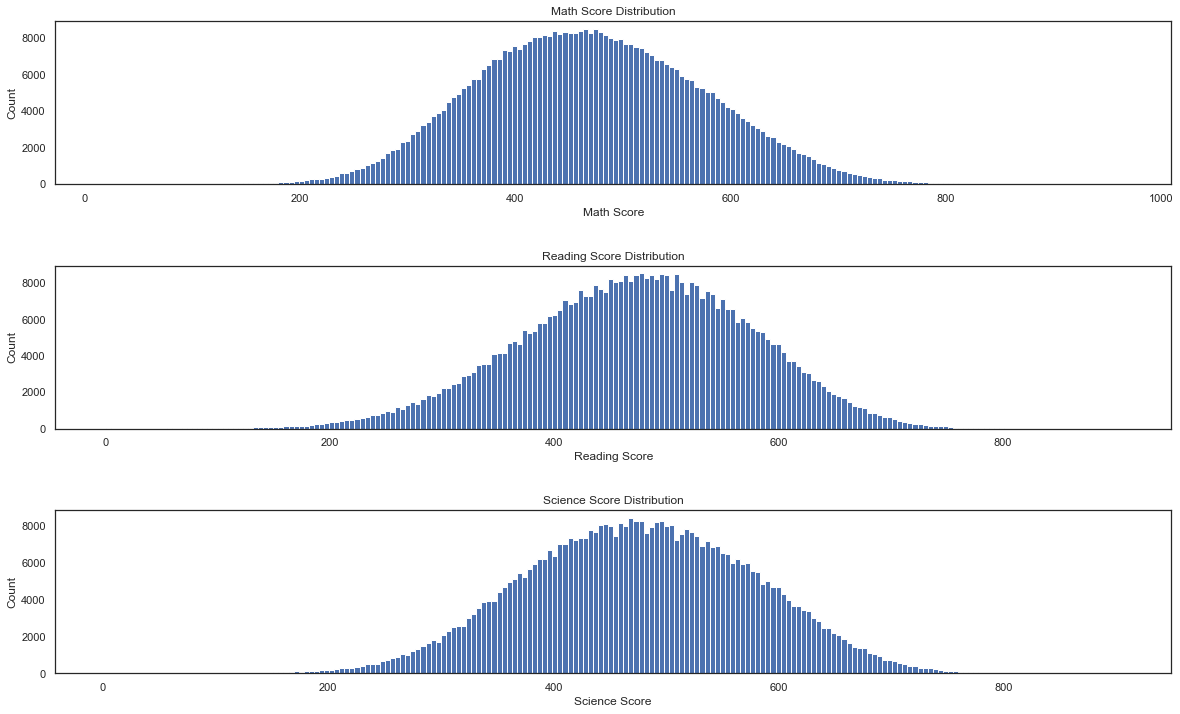

In [80]:
plt.rcParams["figure.figsize"] = (20,12)

# Plotting the math, science and reading test score distribution with subplots
plt.subplot(3,1,1)
# Math score distribution with bin size 200
f = plt.hist(data=pisa, x='math_score', bins=200);
f = plots('Math Score', 'Count', 'Math Score Distribution')
plt.subplots_adjust(hspace = 0.5)

plt.subplot(3,1,2)
g = plt.hist(data=pisa, x='read_score', bins=200);
g = plots('Reading Score', 'Count', 'Reading Score Distribution')

plt.subplot(3,1,3)
h = plt.hist(data=pisa, x='sci_score', bins=200, color=base_color);
h = plots('Science Score', 'Count', 'Science Score Distribution')

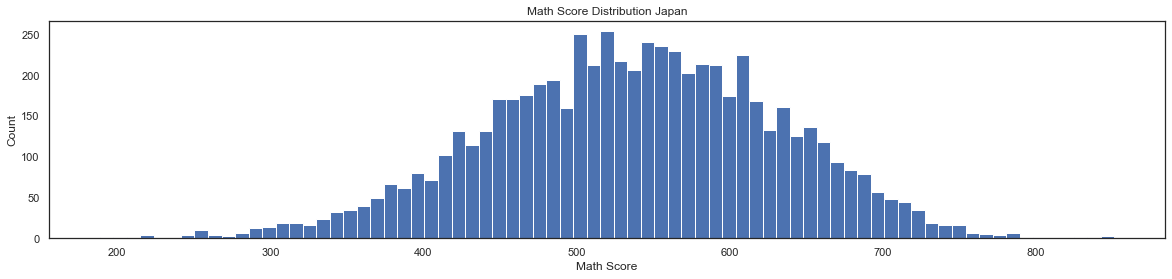

In [81]:
# Math score per Country (japan)
plt.rcParams["figure.figsize"] = (20,4)

japan = pisa.query('country == "Japan"')
japan['math_score'].mean()
f = plt.hist(data=japan, x='math_score', bins=75);
f = plots('Math Score', 'Count', 'Math Score Distribution Japan')

#### Check whether the distributions are normally distributed

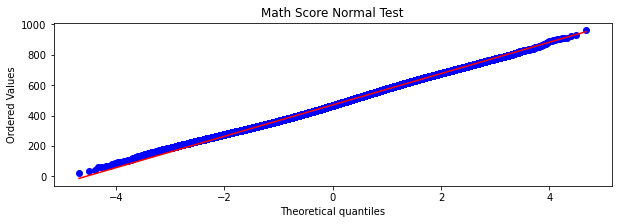

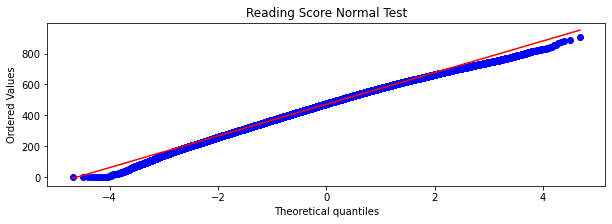

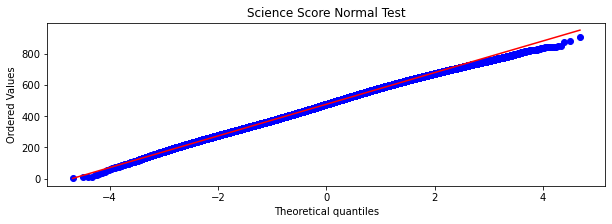

In [27]:
plt.rcParams["figure.figsize"] = (10,3)

# Use stats to see how close to a normal distribution the data is.
stats.probplot(pisa['math_score'], dist="norm", plot=pylab)
plt.title('Math Score Normal Test')
pylab.show()

stats.probplot(pisa['read_score'], dist="norm", plot=pylab)
plt.title('Reading Score Normal Test')
pylab.show()

stats.probplot(pisa['sci_score'], dist="norm", plot=pylab)
plt.title('Science Score Normal Test')
pylab.show()

### Conclusion
All scores seem more or less normally distributed but there is some variation with some skew. Especally the reading score is a little bit left skewed. From the normal tests wen can see that the tails are not quiet normal as well. <br> 
There is a large overlap between the distributions with most of the scores between 400 and 600. Only the math score laggs a little bit behind.

### Distribution of the time spent studying 


In [28]:
# Taking a first look at the study time.
pisa['study_time_min_per_week'].value_counts()

180.0    23086
90.0     21020
120.0    17335
200.0    17016
270.0    14391
         ...  
828.0        1
611.0        1
684.0        1
980.0        1
145.0        1
Name: study_time_min_per_week, Length: 462, dtype: int64

In [29]:
# Finding the highest value. Max in study time
pisa['study_time_min_per_week'].max()

2975.0

The maximal amout of time spent studying is 2975 Mintues which is equivalent to 49.6 Hours. That seems excessiv but it is possible that is a real number and it is not in the data set due to some error.

In [30]:
# Finding the missing data
pisa['study_time_min_per_week'].isna().sum()

214576

A lot of data is missing in that column. Since there is no way to find out how much these kids studyed, I cannot consider them in my analysis.

In [31]:
# Copying the data to delete some rows
study_time = pisa.copy()
study_time = study_time.dropna()

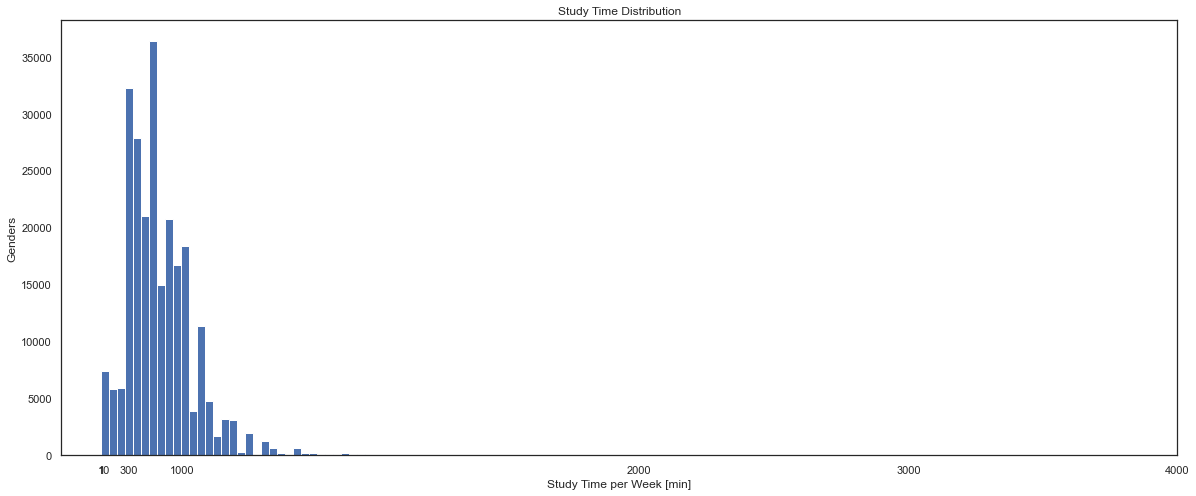

In [117]:
plt.rcParams["figure.figsize"] = (20,8)

# Plotting the distribution of study time with a bin size of 100
f = plt.hist(data=study_time, x='study_time_min_per_week', bins=100)
f = plots('Study Time per Week [min]', 'Genders', 'Study Time Distribution')
# Setting xticks and the values on the x-axis
plt.xticks(ticks=[1, 10, 100, 300, 2000, 3000, 4000], labels=[1, 10, 300, 1000, 2000, 3000, 4000]);

Since there is a very long tail, it makes sence to look at the distribution with a logarithmic scale.

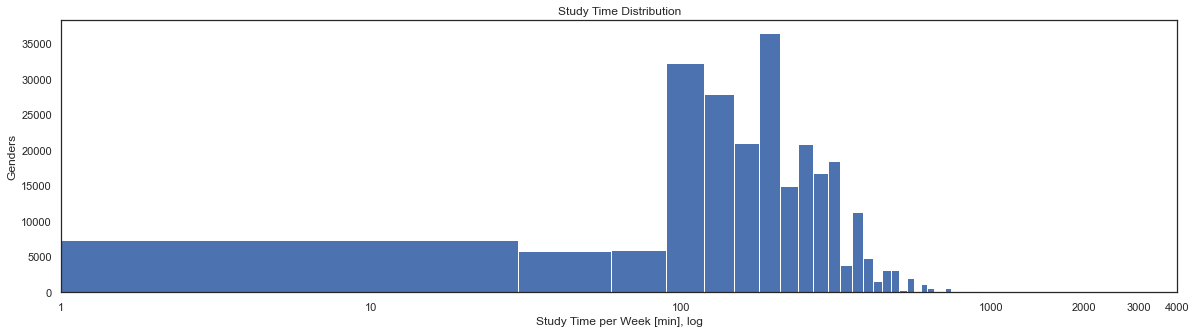

In [118]:
plt.rcParams["figure.figsize"] = (20,5)

f = plt.hist(data=study_time, x='study_time_min_per_week', bins=100)
f = plots('Study Time per Week [min], log', 'Genders', 'Study Time Distribution')
# Plotting the study time with a log x-axis
plt.xscale('log')
# Setting xticks and the values on the x-axis
plt.xticks(ticks=[1, 10, 100, 1000, 2000, 3000, 4000], labels=[1, 10, 100, 1000, 2000, 3000, 4000]);
# Setting the max x-axis
plt.xlim(1, 4000);

### Conclusion:
Most kids study between 100 and 400 minutes per week. Some kids hardly study at all and others do nothing but that. There are a few outliers that seem to study all the time.

### Find the Parents's Degree distribution

What kind of schooling did their parents receive?

In [34]:
# drop the NaN values for this analysis
degrees = pisa.copy()
degrees = degrees.dropna()
degrees.head(2)

,country,student_id,school_id,int_grade,birt_year,gender,mother_degree,father_degree,internet,age,wealth,eco_social_cultural_status,study_time_min_per_week,student_score_weight,math_score,sci_score,read_score
4756,United Arab Emirates,14,1,10,1996,Male,<ISCED level 3A>,<ISCED level 3A>,Yes,15.83,0.37,0.38,225.0,2.8838,473.9913,523.5360,470.7235
4757,United Arab Emirates,15,1,10,1996,Male,<ISCED level 2>,"<ISCED level 3B, 3C>",Yes,15.67,3.09,1.41,180.0,2.8838,338.2225,412.6632,330.5435


In [35]:
# see how many rows are left
len(degrees['father_degree'])

241838

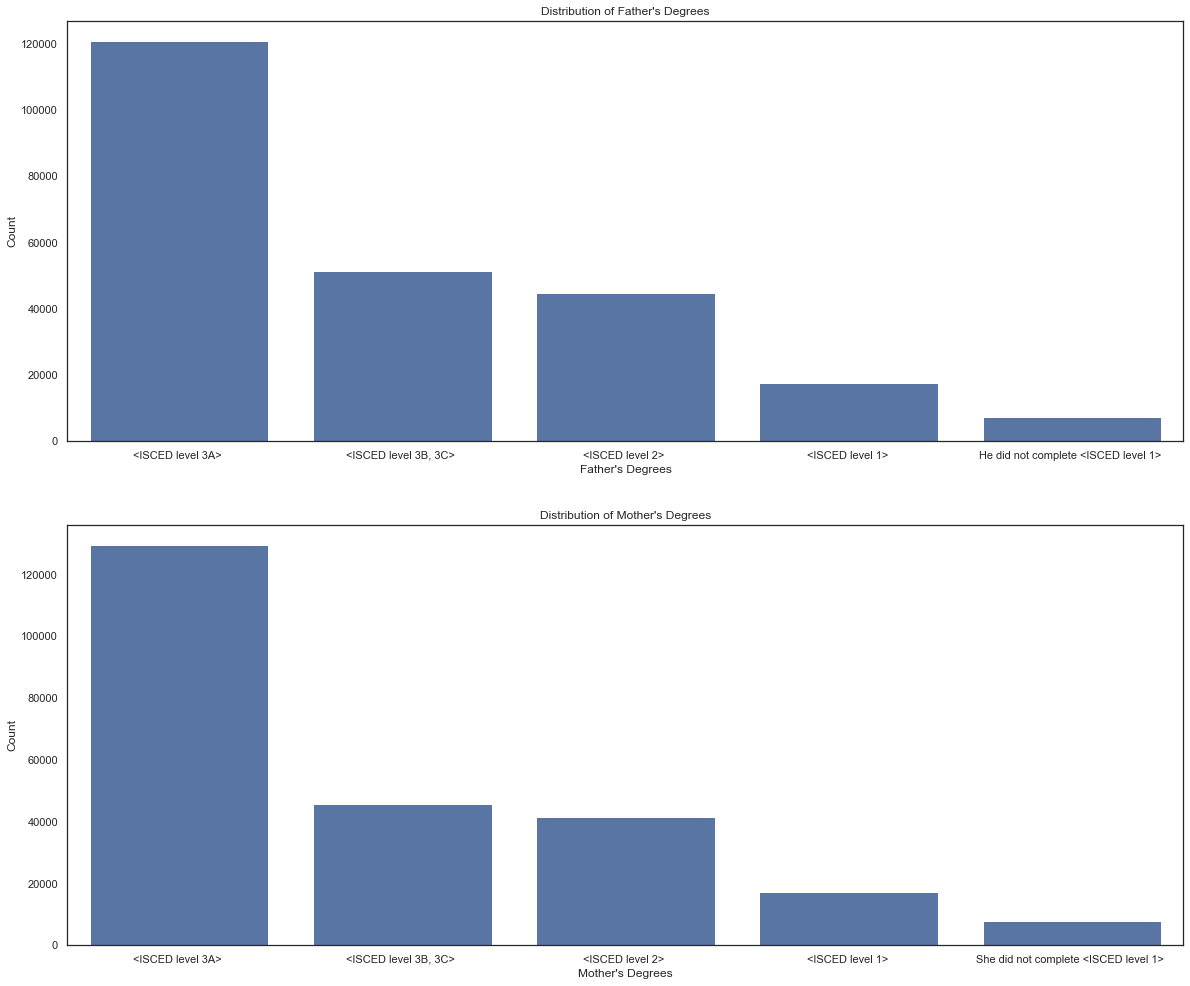

In [85]:
plt.rcParams["figure.figsize"] = (20,17);

# 2 plots. 1: father's schooling 2: Mother's schooling
plt.subplot(2,1,1)
# Order the values by number of occuerences
freq_m = degrees['father_degree'].value_counts()
plt.subplots_adjust(hspace = 0.2)
degree_ord_m = freq_m.index
# plot the distribution for the fathers
f = sb.countplot(data=degrees, x='father_degree', color=base_color, order=degree_ord_m)
f = plots("Father's Degrees", 'Count', "Distribution of Father's Degrees")

plt.subplot(2,1,2)
# Order the values by number of occuerences
freq_f = degrees['mother_degree'].value_counts()
degree_ord_f = freq_f.index
# plot the distribution for the mothers
g = sb.countplot(data=degrees, x='mother_degree', color=base_color, order=degree_ord_f)
g = plots("Mother's Degrees", 'Count', "Distribution of Mother's Degrees")

# When time: remove <> from strings

### Conclusion
Most of the parents completed ISCED level 3A. Only a couple of them did not finish ISCED level 1. In general, the distribution of fathers and mothers look very similar. <br>
ISCED level 3A is equal to Upper secondary education according to Wikipedia. https://de.wikipedia.org/wiki/International_Standard_Classification_of_Education

### Internet access 
How many of the students have internet access?

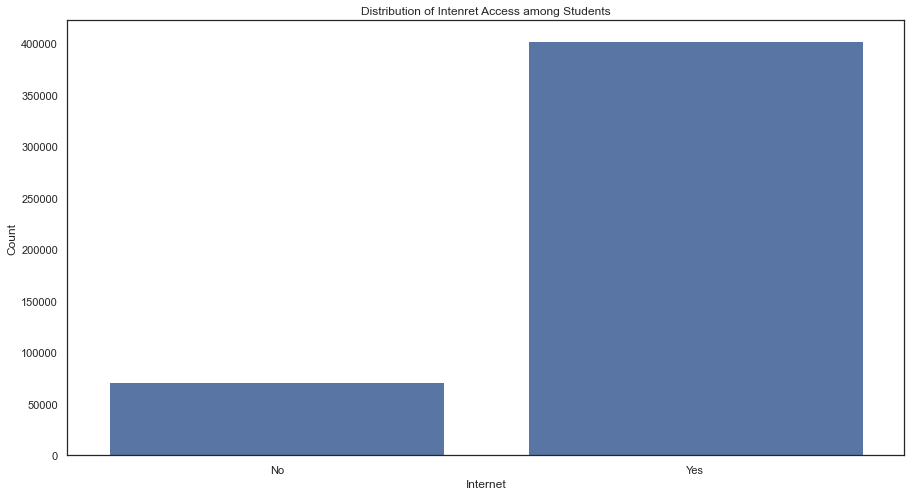

In [119]:
plt.rcParams["figure.figsize"] = (15,8);

# plot the distribution of internet access among the students
f = sb.countplot(data=pisa, x='internet', color=base_color)
f = plots("Internet", 'Count', "Distribution of Intenret Access among Students")

### Conclusion
Fortunately the vast majority of the students have internet access.

## Discussion

The most unusal data point is found in the study time with almost 50 hours per week. Most parents have a high education and most students have intenret access. 
The data seems to be legit with values that make sence.

# Bivariate Exploration

In this section, I investigate relationships between pairs of variables in the
data.

### Whether the kid's family background has an impact on his or her academic performance


In [38]:
study_time.head(2)

,country,student_id,school_id,int_grade,birt_year,gender,mother_degree,father_degree,internet,age,wealth,eco_social_cultural_status,study_time_min_per_week,student_score_weight,math_score,sci_score,read_score
4756,United Arab Emirates,14,1,10,1996,Male,<ISCED level 3A>,<ISCED level 3A>,Yes,15.83,0.37,0.38,225.0,2.8838,473.9913,523.5360,470.7235
4757,United Arab Emirates,15,1,10,1996,Male,<ISCED level 2>,"<ISCED level 3B, 3C>",Yes,15.67,3.09,1.41,180.0,2.8838,338.2225,412.6632,330.5435


In [39]:
pisa['father_degree'].value_counts()

<ISCED level 3A>                        215280
<ISCED level 3B, 3C>                     91179
<ISCED level 2>                          84329
<ISCED level 1>                          35938
He did not complete <ISCED level 1>      16535
Name: father_degree, dtype: int64

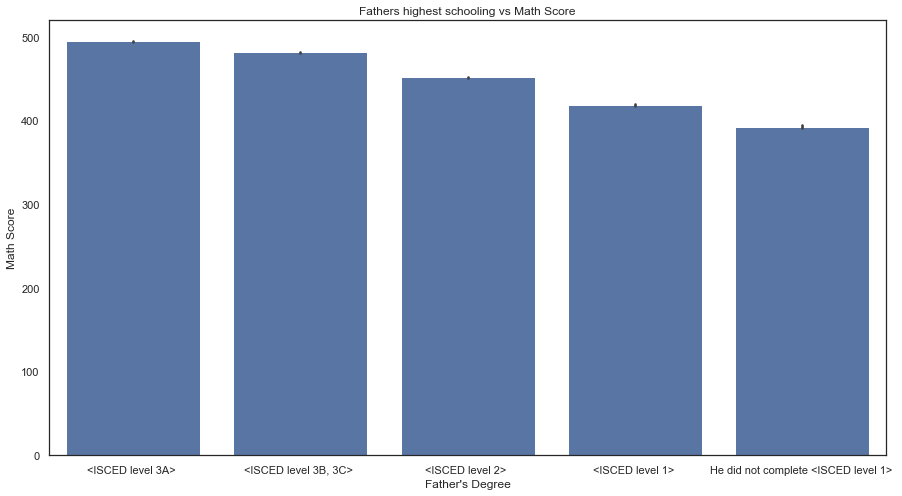

In [120]:
plt.rcParams["figure.figsize"] = (15,8);

order_list = ['<ISCED level 3A> ', '<ISCED level 3B, 3C> ', '<ISCED level 2> ', '<ISCED level 1> ', 'He did not complete <ISCED level 1> ']
# Plotting the father's schooling against the kids math score. Ordered by father's schooling
f = sb.barplot(data=pisa, x='father_degree', y='math_score', color=base_color, order=order_list)
f = plots("Father's Degree", 'Math Score', "Fathers highest schooling vs Math Score")

### Conclusion
Unfortunalty, it seems that kids from lower academic backgrounds do not as good in math as the ones from families with higher schooling. It almost looks like l linear decrease with the father's education.

### Study time per Country

In which country live the most hardworking childer?

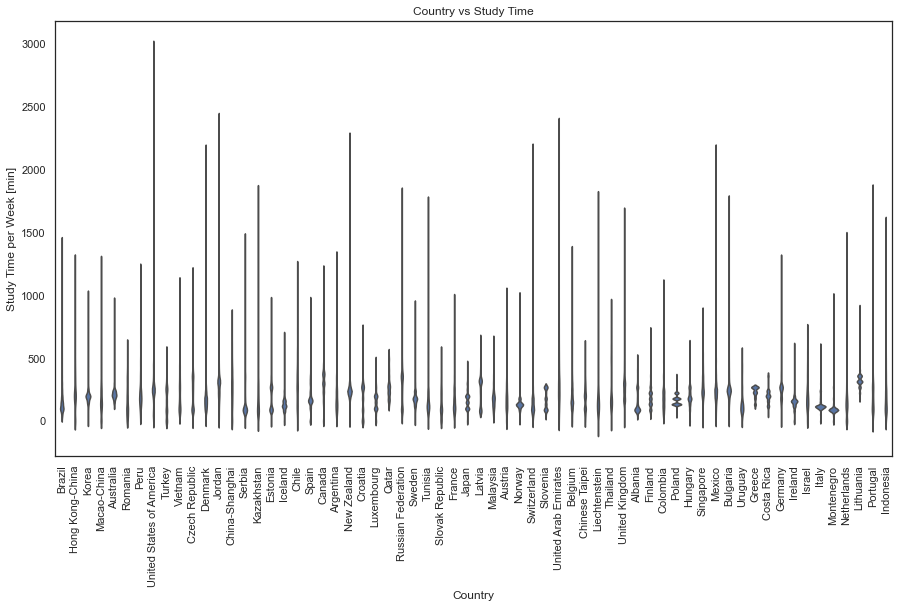

In [89]:
# Copying the dataframe to delete some rows for this analysis
xd = pisa.copy()
# Get the unique countries
country_classes = list(set(xd['country'].values))
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=country_classes)
xd['country'] = xd['country'].astype(vclasses);

#A violinplot to show the country against the study time 
f = sb.violinplot(data=xd, x='country', y='study_time_min_per_week', inner=None, color=base_color);
f = plots("Country", 'Study Time per Week [min]', "Country vs Study Time", 90)
plt.xticks(rotation=90);

Although this plot is not great to draw many conclusions, it is a good first iteration. <br> Especally Mexico, the Arab Emirates and the USA seem to study a lot.
Based on the previous plot I will now look more closely at some countries of interest. These are Slovenia, Poland and Greece. These countires really don't put much time into studiyng.

In [42]:
# Copying the df and selecting the countries of interest
df = pisa.copy()
df = df.dropna()
df = df.query('country == "Poland" or country == "Greece" or country == "Slovenia"')

country_classes = list(set(df['country'].values))
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=country_classes)
df['country'] = df['country'].astype(vclasses);

In [43]:
df.country.value_counts()

Slovenia    3045
Poland      2815
Greece      1828
Name: country, dtype: int64

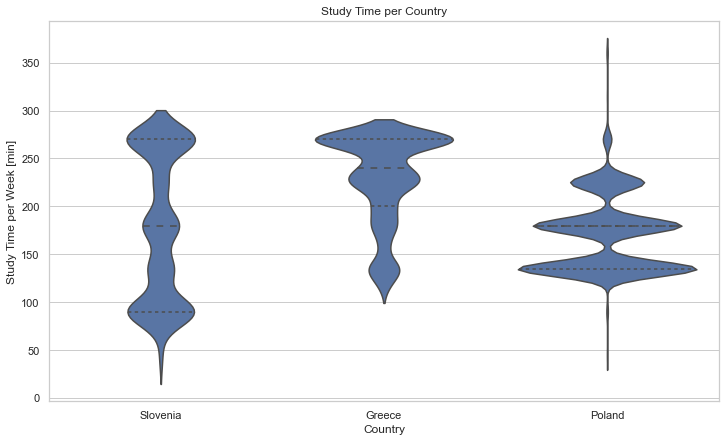

In [91]:
plt.rcParams["figure.figsize"] = (12,7);
sb.set(style = 'whitegrid')

# Plotting the study time of the laziest countries
f = sb.violinplot(data=df, x='country', y='study_time_min_per_week', color=base_color, inner='quartile')
f = plots("Country", 'Study Time per Week [min]', "Study Time per Country")

### Conclusion
In Poland and Slovenia they study the least. These distributions are kind of weird. For Slovenia and Greece there are no outliers that studied a lot. Meanwhile Poland has a lot of outliers in either direction but also three bulks where they study a lot but almost no one studies for instance 160 minutes per week.

### Math score per country

Let's see how countires compare to each other regarding their math abilities.

While this is a lot of data for this kind of plot, I still think a boxplot does the trick to get an overview.

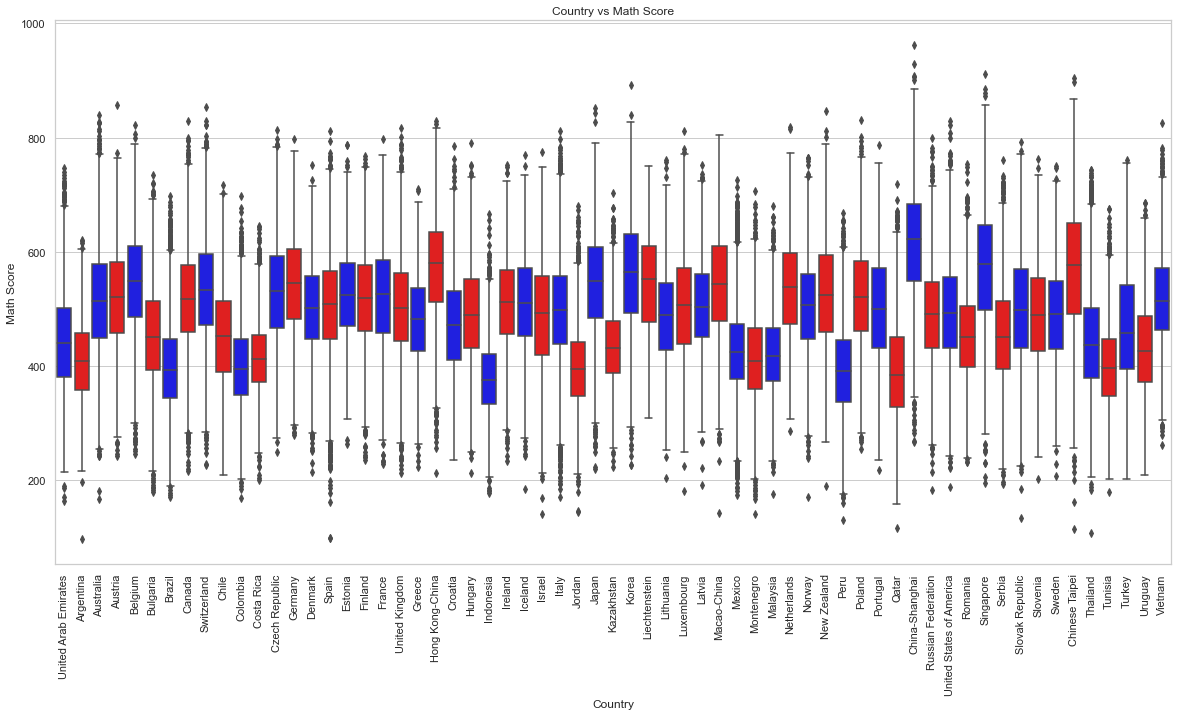

In [92]:
plt.rcParams["figure.figsize"] = (20,10);

# A first boxplot to get an overview of the Math score per country. Alternating colors to make the plot clearer 
f = sb.boxplot(data=study_time, x='country', y='math_score', palette=sb.color_palette(['blue', 'red']))
f = plots("Country", 'Math Score', "Country vs Math Score", 90)

### Conclusion
Shanghai China is clearly best at math. Countries from South America, like Argentinia and Columbia, are a little bit behind. Quatar and Indonesia scored also rather low. <br>
While is plot is not that overseeable, it is a good starting point for further investigation.

#### Let's compre a few european countries
- Germany
- France
- Switzerland
- Italy

In [46]:
# Select the countries of interest 
selected_countries = pisa.query('country == "Germany" or country == "France" or country == "Switzerland" or country == "Italy"')

In [47]:
selected_countries['country'].value_counts()

Italy          31073
Switzerland    11229
Germany         5001
France          4613
Name: country, dtype: int64

There were way more tests taken in Italy than in the other countries.

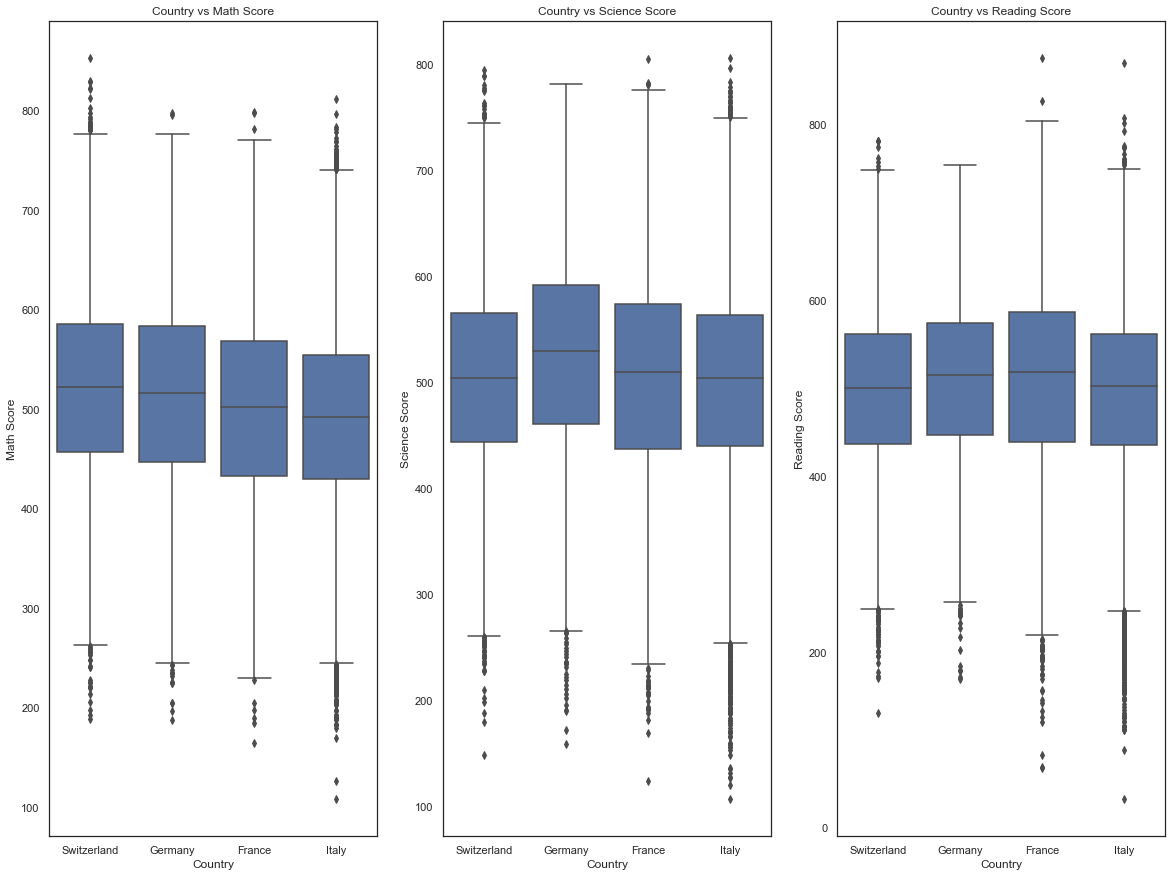

In [93]:
plt.rcParams["figure.figsize"] = (20,15);
sb.set(style='white')

# 3 plots to compare the countries to each other regarding the math, science and reading scores
plt.subplot(1,3,1)
# Boxplot with countries and math score
f = sb.boxplot(data=selected_countries, x='country', y='math_score', color=base_color)
f = plots("Country", 'Math Score', "Country vs Math Score")

plt.subplot(1,3,2)
g = sb.boxplot(data=selected_countries, x='country', y='sci_score', color=base_color)
g = plots("Country", 'Science Score', "Country vs Science Score")

plt.subplot(1,3,3)
g = sb.boxplot(data=selected_countries, x='country', y='read_score', color=base_color)
g = plots("Country", 'Reading Score', "Country vs Reading Score")

A few metrics to compare:

In [49]:
# Calculation of some metrics to comre them to the plots
print('Math mean:', selected_countries['math_score'].mean())
print('Science mean', selected_countries['sci_score'].mean())
print('Reading mean:', selected_countries['read_score'].mean())
print('\n')
print('Math median:', selected_countries['math_score'].median())
print('Science median', selected_countries['sci_score'].median())
print('Reading median:', selected_countries['read_score'].median())
print('\n')
print('Mean math Germany:', selected_countries.query('country == "Germany"')['math_score'].mean())
print('Mean math Switzerland:', selected_countries.query('country == "Switzerland"')['math_score'].mean())
print('Mean math Italy:', selected_countries.query('country == "Italy"')['math_score'].mean())
print('Mean math France:', selected_countries.query('country == "France"')['math_score'].mean())
print('\n')
print('Mean science Germany:', selected_countries.query('country == "Germany"')['sci_score'].mean())
print('Mean science Switzerland:', selected_countries.query('country == "Switzerland"')['sci_score'].mean())
print('Mean science Italy:', selected_countries.query('country == "Italy"')['sci_score'].mean())
print('Mean science France:', selected_countries.query('country == "France"')['sci_score'].mean())

Math mean: 500.9206868325744
Science mean 503.23057816279857
Reading mean: 498.0967548694003


Math median: 501.8772
Science median 506.9377
Reading median: 504.6458


Mean math Germany: 513.9321892621488
Mean math Switzerland: 520.6722063674409
Mean math Italy: 491.9041667653593
Mean math France: 499.4704357034465


Mean science Germany: 523.7129444311149
Mean science Switzerland: 503.1140193338678
Mean science Italy: 500.04843288385956
Mean science France: 502.74398064166536


### Conclusion
In general, all those countries perform rather similar. For math the swiss excels, in science it's germany and for reading there is hardy a difference between the countires. <br>
It seems that Italy has more outliers in the low scores than the other countries in each test. That must reduces their average quiet a bit. It might make sence for the schools in Italy to focus a little bit more on students that struggle to help them improve.

### Math Score vs Internet Access

I would like to know if the math score depends on the internet accessibility.

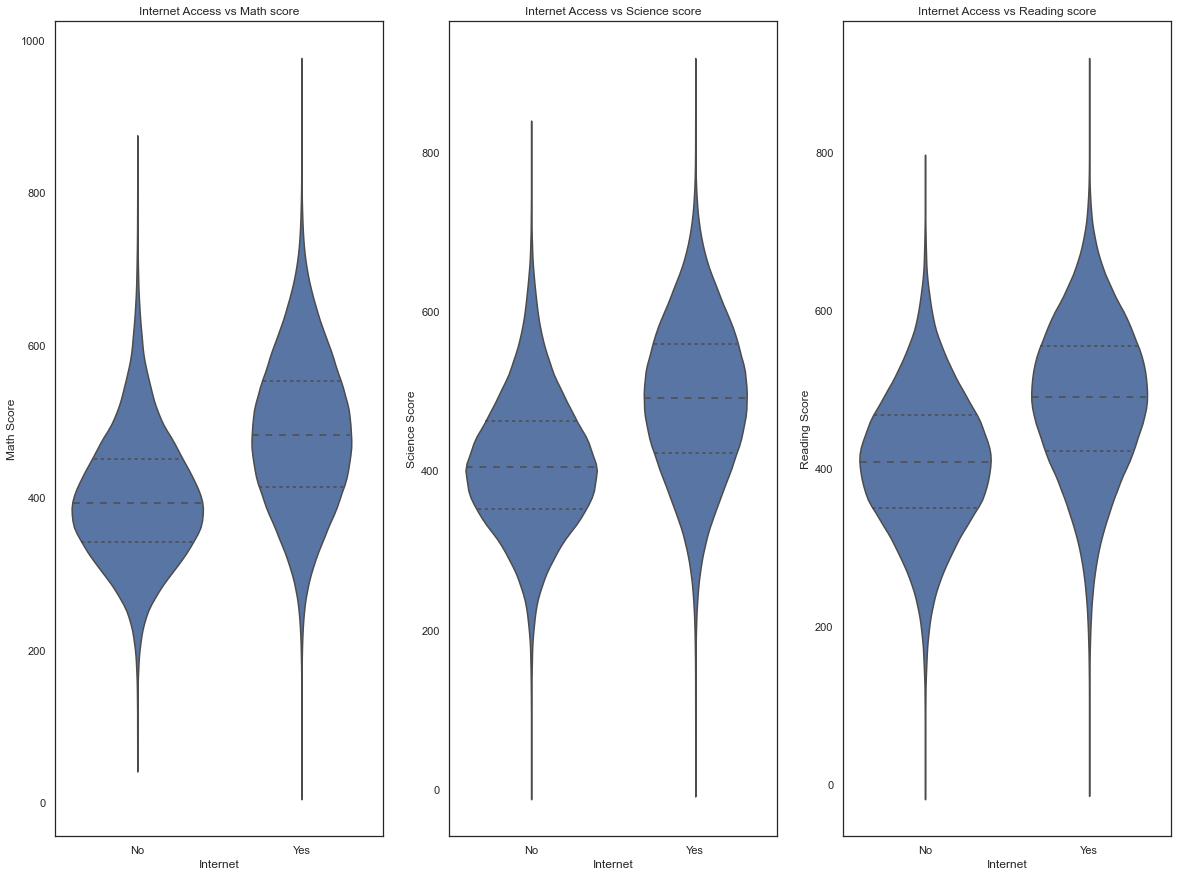

In [94]:
plt.rcParams["figure.figsize"] = (20,15);

# 3 plots to show the effect of internet access to the test scores
plt.subplot(1,3,1)
# Violinplot with quaritles
f = sb.violinplot(data=pisa, x='internet', y='math_score', inner='quartile', color=base_color)
f = plots("Internet", 'Math Score', "Internet Access vs Math score")

plt.subplot(1,3,2)
g = sb.violinplot(data=pisa, x='internet', y='sci_score', inner='quartile', color=base_color)
g = plots("Internet", 'Science Score', "Internet Access vs Science score")

plt.subplot(1,3,3)
h = sb.violinplot(data=pisa, x='internet', y='read_score', inner='quartile', color=base_color)
h = plots("Internet", 'Reading Score', "Internet Access vs Reading score")

### Conclusion
Except for a few outliers in the 'yes' variable, the students with internet access do better in the all the tests. If this is due to the internet access or some underlying factors (like with more wealth comes more education but also more internet) cannot be answered here.

### Study time vs Math Score

I would like to know if the math scores improves with more time spent studying.

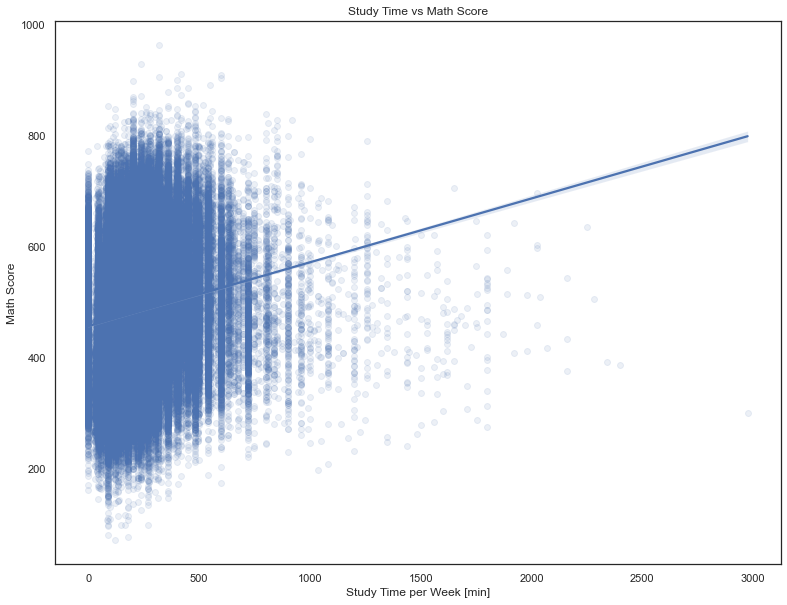

In [95]:
plt.rcParams["figure.figsize"] = (13,10);

# Scatter plot with linear regeression line to show the effect of study time on the math score. Transparency=0.1
f = sb.regplot(data=pisa, x='study_time_min_per_week', y='math_score', scatter_kws={'alpha':0.1});
f = plots("Study Time per Week [min]", 'Math Score', "Study Time vs Math Score")

### Conclusion
From the data points alone there is not really a pattern recognizable. But with the linear regression line you can see that in general the math score gets higher with more time spent studying. <br>
There is one student who spent almost 3000 minutes studying and still got a math score below 400. For him it might make sence to reconsider his way of studying.

## Discussion

For the most part there are the relationships I suspected:
- The Math score improves with more time spent studying 
- Internet access improves math scores (with limitations)
- The math score gets higher with higher education of their father 
- The countries' test scores do not differ that much 

# Multivariate Exploration


### Internet access and farther's education vs math score

The father's schooling and internet access have an impact on the students performance. Let's look at all of these variables togehter. 

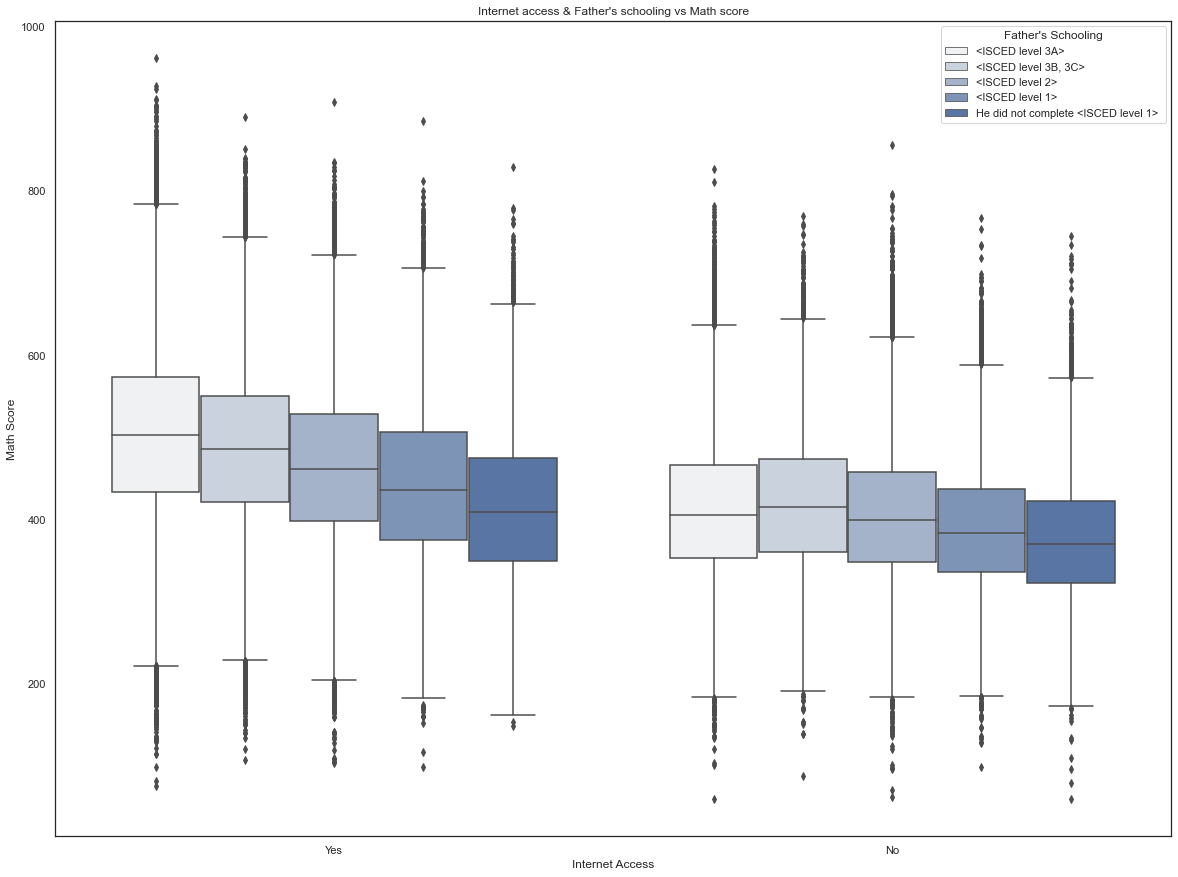

In [97]:
plt.rcParams["figure.figsize"] = (20,15);

# Boxplot with the Internet Access on the x-axis and the math score on the y-axis. The third variable is father's schooling.
# 2 categorical and one qualitative variable. Ordered by father's schooling
f = sb.boxplot(data=pisa, x='internet', y='math_score', hue='father_degree', order=['Yes', 'No'], hue_order=order_list, color=base_color);
f = plots("Internet Access", 'Math Score', "Internet access & Father's schooling vs Math score")
f = plt.legend(title="Father's Schooling");

### Conclusion
We can see that the higher the father's schooling and with Internet access, the better the student does at the math test. There is only one exception. When the kid does not have internet access and the father's schooling is ISCED level 3B, 3C the mean is higher than for students with fathers with ISCED level 3A education. The very best ones, the outliers, are still better when the father has a higher education. <br>
Also, it seems that internet access is more importent than the father's education. All the groups with internet performed better than the ones without, regardless of the father's schooling. But again, that is very likly the sum of other factors as well. <br>
The best chances to succeed has a student with internet access and a father with the highest schooling possible. Reversely, a student without internet access and a father with low education is likely to score not quiet as high as the other groups.

### Study time and Gender vs Math Score

We saw before that most pupils scores improved with more studying. Now let's see how that changes with gender.

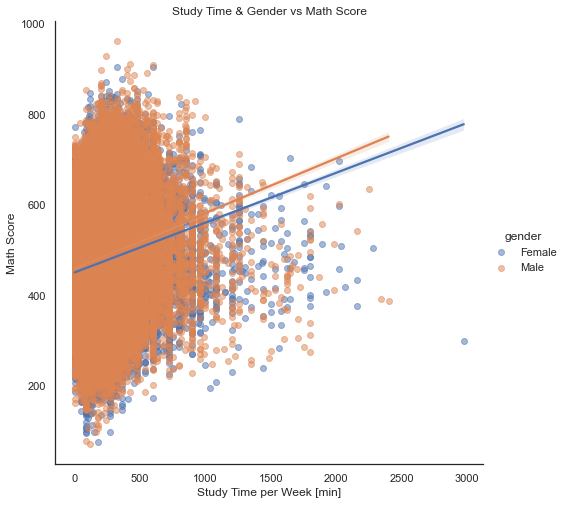

In [98]:
# Seaborn's lmplot. Scatter plot with regression lines for boys and girls. transparency=0.5
# x-axis: Study time. y-axis: math score. hue: gender
f = sb.lmplot(data=pisa, x='study_time_min_per_week', y='math_score', hue='gender', height=7, scatter_kws={'alpha':0.5});
f = plots("Study Time per Week [min]", 'Math Score', "Study Time & Gender vs Math Score")

### Conclusion
Boys and girls can improve their grades with more studying. The graphs are almost parallel thus males and females can increase their math score almost equally well with more studying. <br>
So the biggest difference is that boys simply score higher in math.

### Discussion

When it comes to internet access and father's schooling, the variables add up. The youth has the best chances to get a good score with internet access and a father with a high education. <br>
With gender, study time and the math score, we saw that boys and girls can increase their scores equally well with more time studying.


# Conclusions

It is great that people from PISA put that much effort into these studies. With data like that you can compare countries, schools, learing strategies and way more and use it to provide better education for the whole world. With these metrics you can measure what works best and apply the same strategies elsewhere. That data gives educators and policy makers worldwide the tools to update their education system for the better.
While I do not think these tests can show the whole picture about a pupil's academic abilities, it is still a great metric to use.

## My take on the data
I started this analysis with univariate exploration to get familiar with the data and to see if I can answer the questions I was curious about. What interested me the most was how the countries compare, the influence of the parents education, the time spent studying,  what impact internet access has and what influence the gender has on the test scores. <br>
When I moved to bivariate exloration I gained further knowlegde about these questions. I showed that the father's schooling has an influence on test scores and in which countries pupils study the most. <br>
In the multivariate part I put some of these facotrs together and found that childern with internet access and a father with a high schooling have the best test scores. In addiction, boys and girls can improve their scores equally well with more time spent sudying.